In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO

In [5]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [6]:
features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']

In [7]:
df_train = {}
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                         'repulsive', 'repulsive', 'handsome']
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                                   'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                                  'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [8]:
df_test = {}
df_test['Looks'] = ['handsome', 'handsome', 'repulsive']
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [9]:
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Eloquence_average,Looks_repulsive,Money_spent_lots,Alcoholic_beverage_no,Eloquence_high,Looks_handsome,Alcoholic_beverage_yes,Money_spent_little
0,0,0,1,0,1,1,1,0
1,0,0,0,0,0,1,1,1
2,1,0,1,1,0,1,0,0
3,1,1,0,1,0,0,0,1
4,0,1,1,0,0,0,1,0
5,0,1,1,0,1,0,1,0
6,1,0,1,0,0,1,1,0


In [11]:
clf = DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy')

In [13]:
from sklearn import tree

[Text(223.2, 380.52, 'X[2] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(111.6, 271.8, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(334.79999999999995, 271.8, 'X[5] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(223.2, 163.07999999999998, 'X[4] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(111.6, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.79999999999995, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(446.4, 163.07999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

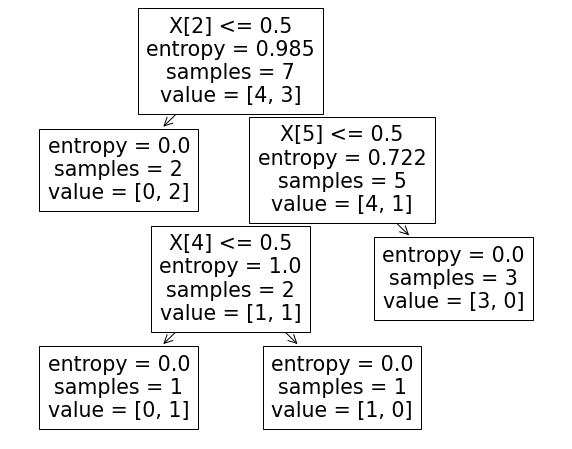

In [14]:
tree.plot_tree(clf)

In [1]:
balls = [1 for i in range(9)] + [0 for i in range(11)]

In [2]:
balls_left  = [1 for i in range(8)] + [0 for i in range(5)] # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]